In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [9]:
df = pd.read_csv('movies_metadata.csv')
df=df.dropna()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df

,Title,Genres,Budget,Date,Year,Company,Countries,Revenue,Runtime,Rating,Vote
0,Toy Story,Animation,30000000,30-10-1995,1995,Pixar Animation Studios,United States of America,373554033.0,81.0,7.7,5415.0
1,Jumanji,Adventure,65000000,15-12-1995,1995,TriStar Pictures,United States of America,262797249.0,104.0,6.9,2413.0
2,Grumpier Old Men,Romance,0,22-12-1995,1995,Warner Bros.,United States of America,0.0,101.0,6.5,92.0
3,Waiting to Exhale,Comedy,16000000,22-12-1995,1995,Twentieth Century Fox Film Corporation,United States of America,81452156.0,127.0,6.1,34.0
4,Father of the Bride Part II,Comedy,0,10-02-1995,1995,Sandollar Productions,United States of America,76578911.0,106.0,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...
45458,The Burkittsville 7,Horror,0,03-10-2000,2000,Neptune Salad Entertainment,United States of America,0.0,30.0,7.0,1.0
45459,Caged Heat 3000,Science Fiction,0,01-01-1995,1995,Concorde-New Horizons,United States of America,0.0,85.0,3.5,1.0
45460,Robin Hood,Drama,0,13-05-1991,1991,Westdeutscher Rundfunk (WDR),Canada,0.0,104.0,5.7,26.0
45462,Siglo ng Pagluluwal,Drama,0,17-11-2011,2011,Sine Olivia,Philippines,0.0,360.0,9.0,3.0


In [11]:
# detect the missing values
df.isna()
count = df.isna().sum()
count

Title        0
Genres       0
Budget       0
Date         0
Year         0
Company      0
Countries    0
Revenue      0
Runtime      0
Rating       0
Vote         0
dtype: int64

In [20]:
# Data Types for our columns

print(df.dtypes)

Title         object
Genres        object
Budget         int64
Date          object
Year          object
Company       object
Countries     object
Revenue      float64
Runtime      float64
Rating       float64
Vote         float64
dtype: object


In [19]:
df[["Budget", "Revenue","Runtime","Vote"]] = df[["Budget", "Revenue","Runtime","Vote"]].apply(pd.to_numeric)

<AxesSubplot:>

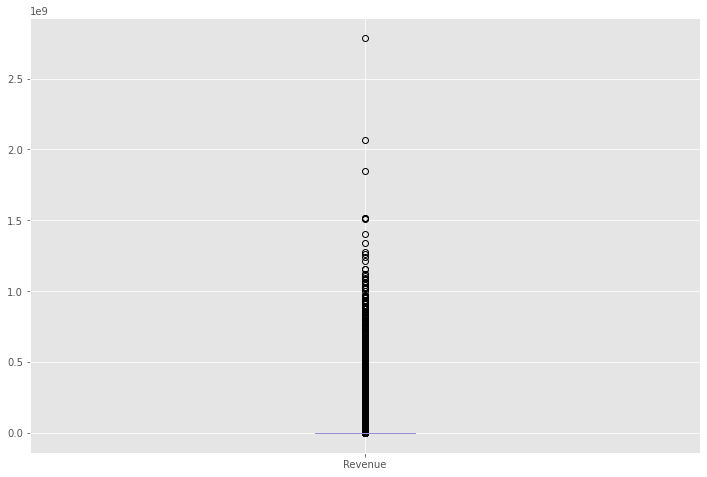

In [13]:
# Are there any Outliers?

df.boxplot(column=['Revenue'])

In [14]:
df.drop_duplicates()

,Title,Genres,Budget,Date,Year,Company,Countries,Revenue,Runtime,Rating,Vote
0,Toy Story,Animation,30000000,30-10-1995,1995,Pixar Animation Studios,United States of America,373554033.0,81.0,7.7,5415.0
1,Jumanji,Adventure,65000000,15-12-1995,1995,TriStar Pictures,United States of America,262797249.0,104.0,6.9,2413.0
2,Grumpier Old Men,Romance,0,22-12-1995,1995,Warner Bros.,United States of America,0.0,101.0,6.5,92.0
3,Waiting to Exhale,Comedy,16000000,22-12-1995,1995,Twentieth Century Fox Film Corporation,United States of America,81452156.0,127.0,6.1,34.0
4,Father of the Bride Part II,Comedy,0,10-02-1995,1995,Sandollar Productions,United States of America,76578911.0,106.0,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...
45458,The Burkittsville 7,Horror,0,03-10-2000,2000,Neptune Salad Entertainment,United States of America,0.0,30.0,7.0,1.0
45459,Caged Heat 3000,Science Fiction,0,01-01-1995,1995,Concorde-New Horizons,United States of America,0.0,85.0,3.5,1.0
45460,Robin Hood,Drama,0,13-05-1991,1991,Westdeutscher Rundfunk (WDR),Canada,0.0,104.0,5.7,26.0
45462,Siglo ng Pagluluwal,Drama,0,17-11-2011,2011,Sine Olivia,Philippines,0.0,360.0,9.0,3.0


In [15]:
# Order our Data a little bit to see

df.sort_values(by=['Revenue'], inplace=False, ascending=False)


,Title,Genres,Budget,Date,Year,Company,Countries,Revenue,Runtime,Rating,Vote
14551,Avatar,Action,237000000,10-12-2009,2009,Ingenious Film Partners,United States of America,2.787965e+09,162.0,7.2,12114.0
26555,Star Wars: The Force Awakens,Action,245000000,15-12-2015,2015,Lucasfilm,United States of America,2.068224e+09,136.0,7.5,7993.0
1639,Titanic,Drama,200000000,18-11-1997,1997,Paramount Pictures,United States of America,1.845034e+09,194.0,7.5,7770.0
17818,The Avengers,Science Fiction,220000000,25-04-2012,2012,Paramount Pictures,United States of America,1.519558e+09,143.0,7.4,12000.0
25084,Jurassic World,Action,150000000,09-06-2015,2015,Universal Studios,United States of America,1.513529e+09,124.0,6.5,8842.0
...,...,...,...,...,...,...,...,...,...,...,...
16309,獨臂刀,Action,0,26-07-1967,1967,Shaw Brothers,Hong Kong,0.000000e+00,111.0,6.8,23.0
16308,Sous le soleil de Satan,Drama,0,14-05-1987,1987,Films A2,France,0.000000e+00,93.0,5.5,15.0
16307,Glue,Drama,0,02-02-2006,2006,Diablo Films,Argentina,0.000000e+00,110.0,6.2,6.0
16306,藪の中の黒猫,Horror,0,24-02-1968,1968,Toho Company,Japan,0.000000e+00,99.0,7.2,41.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue', ylabel='Budget'>

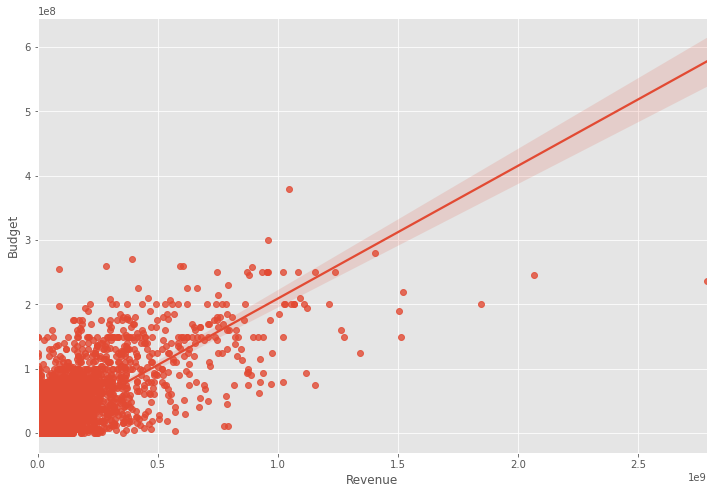

In [21]:
X=df['Revenue']
Y=df['Budget']
sns.regplot(X,Y)

<AxesSubplot:xlabel='Rating', ylabel='Revenue'>

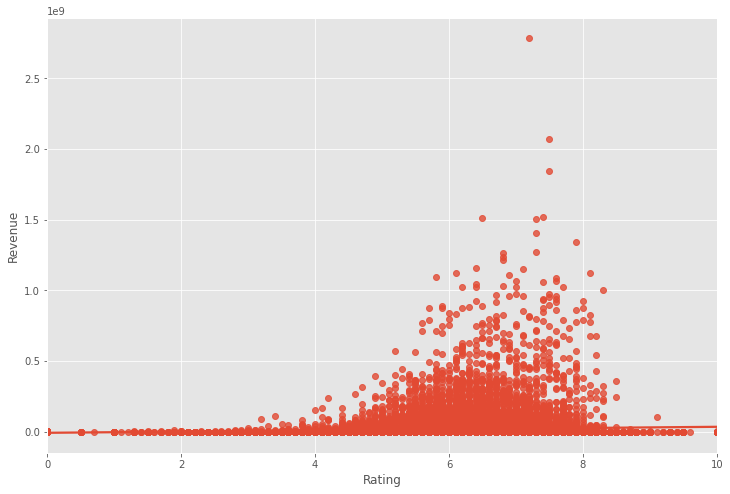

In [22]:
sns.regplot(x="Rating", y="Revenue", data=df)

In [23]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,Budget,Revenue,Runtime,Rating,Vote
Budget,1.000000,0.766850,0.156021,0.068074,0.671598
Revenue,0.766850,1.000000,0.121941,0.091423,0.809817
Runtime,0.156021,0.121941,1.000000,0.153200,0.130785
Rating,0.068074,0.091423,0.153200,1.000000,0.139221
Vote,0.671598,0.809817,0.130785,0.139221,1.000000


In [24]:
df.corr(method ='kendall')

,Budget,Revenue,Runtime,Rating,Vote
Budget,1.000000,0.616027,0.183376,0.049075,0.428656
Revenue,0.616027,1.000000,0.206056,0.099545,0.465942
Runtime,0.183376,0.206056,1.000000,0.156109,0.185307
Rating,0.049075,0.099545,0.156109,1.000000,0.196201
Vote,0.428656,0.465942,0.185307,0.196201,1.000000


In [25]:
df.corr(method ='spearman')

,Budget,Revenue,Runtime,Rating,Vote
Budget,1.000000,0.666566,0.234713,0.063616,0.536271
Revenue,0.666566,1.000000,0.261191,0.126450,0.572129
Runtime,0.234713,0.261191,1.000000,0.218719,0.269131
Rating,0.063616,0.126450,0.218719,1.000000,0.276291
Vote,0.536271,0.572129,0.269131,0.276291,1.000000


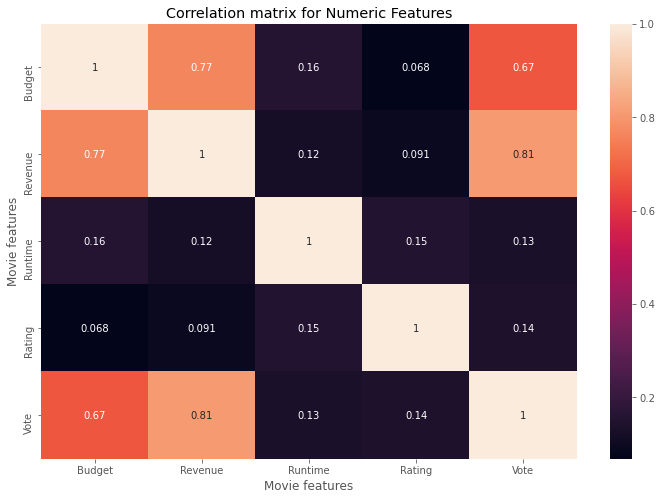

In [26]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [27]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Title,Genres,Budget,Date,Year,Company,Countries,Revenue,Runtime,Rating,Vote
Title,1.000000,0.069152,-0.006058,0.718865,0.370065,0.580038,0.221328,-0.055303,0.150169,0.181943,-0.131834
Genres,0.069152,1.000000,-0.019248,0.084429,0.036416,0.109368,-0.006458,-0.062461,-0.009263,0.078993,-0.069410
Budget,-0.006058,-0.019248,1.000000,0.027665,0.112078,-0.001322,0.019273,0.208572,0.008487,-0.030896,0.178702
Date,0.718865,0.084429,0.027665,1.000000,0.479644,0.449956,0.118758,0.065398,0.103915,0.119122,0.004189
Year,0.370065,0.036416,0.112078,0.479644,1.000000,0.359957,0.120039,0.248860,0.013721,-0.005231,0.196979
Company,0.580038,0.109368,-0.001322,0.449956,0.359957,1.000000,0.242648,-0.106795,0.075944,0.152641,-0.169329
Countries,0.221328,-0.006458,0.019273,0.118758,0.120039,0.242648,1.000000,-0.046573,0.011392,0.013728,-0.097927
Revenue,-0.055303,-0.062461,0.208572,0.065398,0.248860,-0.106795,-0.046573,1.000000,-0.094795,-0.126408,0.562740
Runtime,0.150169,-0.009263,0.008487,0.103915,0.013721,0.075944,0.011392,-0.094795,1.000000,0.044407,-0.061974
Rating,0.181943,0.078993,-0.030896,0.119122,-0.005231,0.152641,0.013728,-0.126408,0.044407,1.000000,-0.110924


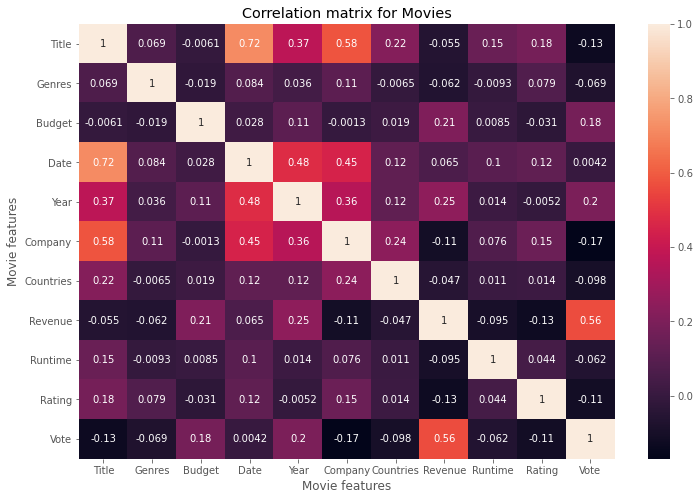

In [28]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [29]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Title  Title        1.000000
       Genres       0.069152
       Budget      -0.006058
       Date         0.718865
       Year         0.370065
                      ...   
Vote   Countries   -0.097927
       Revenue      0.562740
       Runtime     -0.061974
       Rating      -0.110924
       Vote         1.000000
Length: 121, dtype: float64


In [30]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

Vote     Company   -0.169329
Company  Vote      -0.169329
Title    Vote      -0.131834
Vote     Title     -0.131834
Rating   Revenue   -0.126408
                      ...   
Date     Date       1.000000
Budget   Budget     1.000000
Genres   Genres     1.000000
Rating   Rating     1.000000
Vote     Vote       1.000000
Length: 121, dtype: float64


In [31]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

Revenue    Vote         0.562740
Vote       Revenue      0.562740
Company    Title        0.580038
Title      Company      0.580038
           Date         0.718865
Date       Title        0.718865
Title      Title        1.000000
Company    Company      1.000000
Runtime    Runtime      1.000000
Revenue    Revenue      1.000000
Countries  Countries    1.000000
Year       Year         1.000000
Date       Date         1.000000
Budget     Budget       1.000000
Genres     Genres       1.000000
Rating     Rating       1.000000
Vote       Vote         1.000000
dtype: float64


In [33]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('Company')[["Revenue"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('Revenue', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['Revenue'].astype('int64') 

CompanyGrossSumSorted

Company
Paramount Pictures                        46824459112
Universal Pictures                        45849261653
Walt Disney Pictures                      39776650740
Columbia Pictures                         31884631144
Twentieth Century Fox Film Corporation    31182765770
New Line Cinema                           16041576985
Village Roadshow Pictures                 12612395710
Warner Bros.                              12274058211
DreamWorks SKG                            11154345261
Lucasfilm                                  9898421106
Summit Entertainment                       7468825367
Ingenious Film Partners                    7338943472
Columbia Pictures Corporation              7331698342
DreamWorks Animation                       6893614288
WingNut Films                              6739064270
Name: Revenue, dtype: int64

In [34]:
df.groupby(['Company', 'Year'])[["Revenue"]].sum()

Revenue
Company      Year         
"'A'         1998      0.0
"Ali'n       2013      0.0
"Anarchist's 2007      0.0
             2010      0.0
"Archer's    2016      0.0
...                    ...
영화사 수박       2014      0.0
영화사 집        2016      0.0
이디오플랜        2017      0.0
인벤트 디        2014      0.0
프로덕션M        2005      0.0

[21566 rows x 1 columns]

In [35]:

CompanyGrossSum = df.groupby(['Company', 'Year'])[["Revenue"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['Revenue','Company','Year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['Revenue'].astype('int64') 

CompanyGrossSumSorted

Company                                 Year
Walt Disney Pictures                    2016    5338535807
Universal Pictures                      2015    3768582013
Walt Disney Pictures                    2010    3695008268
Universal Pictures                      2016    3684233878
Columbia Pictures                       2012    3541506780
Paramount Pictures                      2011    3536451697
Walt Disney Pictures                    2017    3270664523
Ingenious Film Partners                 2009    3176373152
Universal Pictures                      2012    2969940729
Paramount Pictures                      2014    2965378277
Walt Disney Pictures                    2013    2931270366
Twentieth Century Fox Film Corporation  2016    2779867507
Walt Disney Pictures                    2007    2699787159
Columbia Pictures                       2009    2590967803
Paramount Pictures                      1997    2473720268
Name: Revenue, dtype: int64

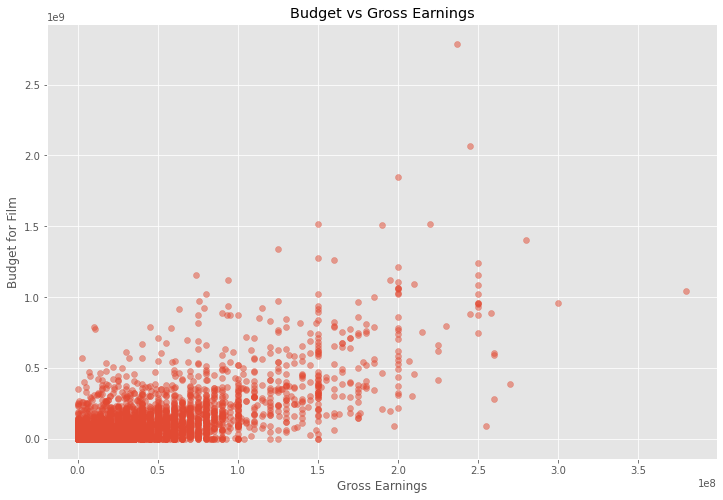

In [36]:
plt.scatter(x=df['Budget'], y=df['Revenue'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [37]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,Title,Genres,Budget,Date,Year,Company,Countries,Revenue,Runtime,Rating,Vote
0,26589,2,30000000,14789,96,7148,134,373554033.0,81.0,7.7,5415.0
1,11545,1,65000000,7645,96,9356,134,262797249.0,104.0,6.9,2413.0
2,9116,14,0,11125,96,9841,134,0.0,101.0,6.5,92.0
3,27709,3,16000000,11125,96,9433,134,81452156.0,127.0,6.1,34.0
4,7715,3,0,4688,96,8030,134,76578911.0,106.0,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...
45458,22293,11,0,1699,101,6426,134,0.0,30.0,7.0,1.0
45459,3935,15,0,86,96,2244,134,0.0,85.0,3.5,1.0
45460,18804,6,0,6307,92,9900,26,0.0,104.0,5.7,26.0
45462,19956,6,0,8594,112,8339,99,0.0,360.0,9.0,3.0


In [38]:
df_numerized.corr(method='pearson')

,Title,Genres,Budget,Date,Year,Company,Countries,Revenue,Runtime,Rating,Vote
Title,1.000000,0.000335,-0.007893,0.004018,-0.029755,0.018051,-0.028523,-0.003837,0.042777,0.046609,-0.011373
Genres,0.000335,1.000000,-0.103614,-0.007936,-0.016623,-0.042603,-0.005577,-0.077688,0.011405,-0.072514,-0.058338
Budget,-0.007893,-0.103614,1.000000,0.036508,0.171601,0.061706,0.064921,0.766850,0.156021,0.068074,0.671598
Date,0.004018,-0.007936,0.036508,1.000000,0.018931,0.005309,-0.003003,0.031888,0.026932,0.028824,0.034535
Year,-0.029755,-0.016623,0.171601,0.018931,1.000000,-0.109368,-0.193199,0.116537,0.116528,0.044145,0.140378
Company,0.018051,-0.042603,0.061706,0.005309,-0.109368,1.000000,0.068426,0.060433,-0.002629,0.016894,0.052142
Countries,-0.028523,-0.005577,0.064921,-0.003003,-0.193199,0.068426,1.000000,0.072131,-0.051671,-0.081979,0.063808
Revenue,-0.003837,-0.077688,0.766850,0.031888,0.116537,0.060433,0.072131,1.000000,0.121941,0.091423,0.809817
Runtime,0.042777,0.011405,0.156021,0.026932,0.116528,-0.002629,-0.051671,0.121941,1.000000,0.153200,0.130785
Rating,0.046609,-0.072514,0.068074,0.028824,0.044145,0.016894,-0.081979,0.091423,0.153200,1.000000,0.139221


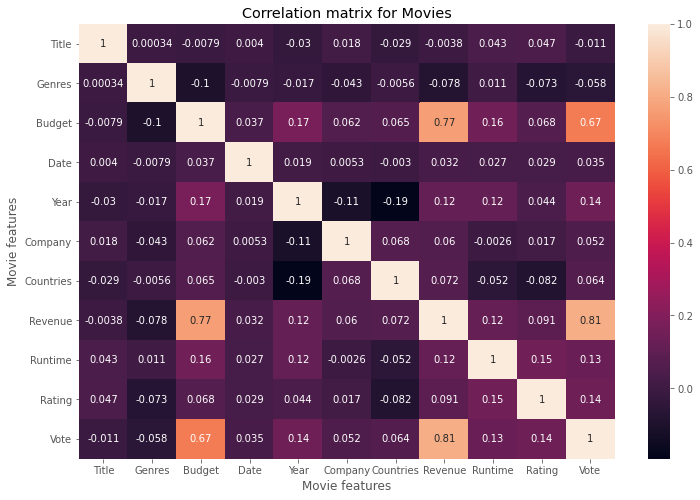

In [39]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

### From this, we can infer that the  Budget, Revenue, Vote are highly correlated with each other.